<a href="https://colab.research.google.com/github/olusho101/CaseStudy2DDS/blob/master/Letters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [196]:
import numpy as np
from sklearn.utils import shuffle
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras import Sequential, Model

## Import the Dataset

Import the dataset and look at some examples.

The MNIST dataset consists of handwritten digits (0-9).
Pixel values are from 0 to 255.

In [253]:
# load in the dataset
#(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

!pip install emnist
from emnist import extract_training_samples,extract_test_samples
x_train,y_train=extract_training_samples('letters')
x_test,y_test=extract_test_samples('letters')
set(y_train)
# note that these are just numpy arrays
type(x_train)

numpy.ndarray

In [254]:
# note that these are just numpy arrays
type(x_train)

numpy.ndarray

In [255]:
# the x training data is 60,000 examples of 28x28 images
print(x_train.shape)

(124800, 28, 28)


In [258]:
print(y_train.shape)

(24000,)


In [259]:
# train and test sets for letter A-E
x_train = x_train[y_train < 6] / 255.
y_train = y_train[y_train < 6]
x_test = x_test[y_test < 6] / 255.
y_test = y_test[y_test < 6]

Look at some numbers



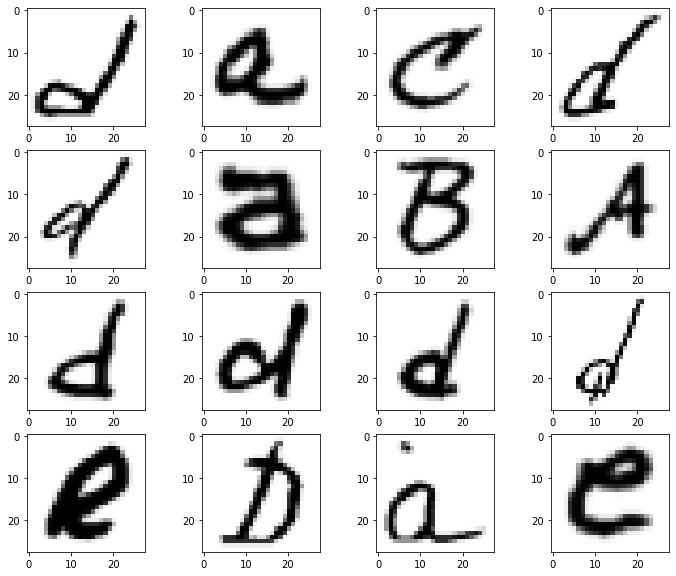

In [260]:
# Look at some random numbers
X_shuffle = shuffle(x_train.copy(), random_state=42)

print('Look at some numbers\n')
plt.figure(figsize = (12,10))
row, colums = 4, 4
for i in range(16):
    plt.subplot(colums, row, i+1)
    plt.imshow(X_shuffle[i].reshape(28,28),interpolation='nearest', cmap='Greys')
plt.show()

## Data Preprocessing

We need to do the following to preprocess the data:

1. Divide the values by the max value (255)
2. Add a color channel (require by the convolutional layer)

By default Keras assumes images are formatted as (number of examples, x-dim, y-dim, number of colors)

An RGB image has 3 color channels, greyscale as 1 color channel

In [261]:
x_train.max()

0.00392156862745098

In [262]:
x_train.shape

(24000, 28, 28)

In [263]:
# divide by the color channel
#x_train = x_train / 255.
#x_test = x_test / 255.

In [264]:
# add the color channel
x_train = x_train.reshape(x_train.shape + (1,))
x_test = x_test.reshape(x_test.shape + (1,))

In [265]:
x_train.shape

(24000, 28, 28, 1)

## Setup the Model

This is a very basic convolutional network.
There are essentially two sections
1. convolutional feature extraction layers
2. dense (fully-connected) classifier layers

In [266]:
num_classes=27
filters=32
kernel_size=3
pool_size=2
dropout=0.2
input_shape = (28,28,1)

model = Sequential([
      # convolutional feature extraction
      # ConvNet 1

        # convoultional part
      keras.layers.Conv2D(filters, kernel_size, padding = 'valid',
              activation='relu',
              input_shape=input_shape),
        # pooling part
      keras.layers.MaxPooling2D(pool_size=pool_size),

      # ConvNet 2
      
        # convoultional part
      keras.layers.Conv2D(filters, kernel_size,
              padding = 'valid',
              activation='relu'),
        # pooling part
      keras.layers.MaxPooling2D(pool_size=pool_size),

      # classification 
      # will retrain from here
      keras.layers.Flatten(name='flatten'),

      keras.layers.Dropout(dropout),
      keras.layers.Dense(128, activation='relu'),
      
      keras.layers.Dropout(dropout, name='penult'),
      keras.layers.Dense(num_classes, activation='softmax', name='last')
  ])

In [267]:
# print summary of model as check
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 11, 11, 32)        9248      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 800)               0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 800)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 128)              

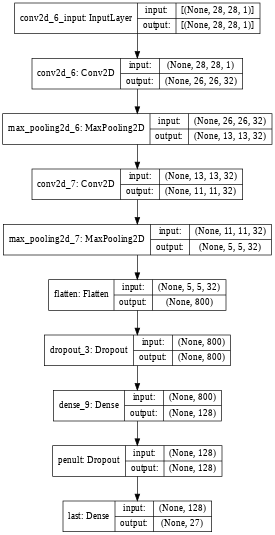

In [268]:
# print image of model as check
keras.utils.plot_model(model, show_shapes=True, dpi=48)

In [269]:
es = keras.callbacks.EarlyStopping(min_delta=0.001, patience=2)

In [270]:
y_train

array([5, 2, 5, ..., 1, 2, 2], dtype=uint8)

## Loss Functions

When y labels are sequential use `sparse_categorical_crossentropy`.  
When y labels are onehot encoded, use `categorical_crossentropy`.

In [271]:
model.compile(loss='sparse_categorical_crossentropy',
                      optimizer='adam',
                      metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    validation_split=0.2,
                    batch_size=32,
                    epochs=1000,
                    callbacks=[es])

Epoch 1/1000
600/600 [==============================] - 16s 26ms/step - loss: 1.6495 - accuracy: 0.2446 - val_loss: 1.0488 - val_accuracy: 0.6656
Epoch 2/1000
600/600 [==============================] - 16s 26ms/step - loss: 0.6325 - accuracy: 0.7677 - val_loss: 0.4486 - val_accuracy: 0.8431
Epoch 3/1000
600/600 [==============================] - 15s 26ms/step - loss: 0.4352 - accuracy: 0.8489 - val_loss: 0.3290 - val_accuracy: 0.8842
Epoch 4/1000
600/600 [==============================] - 15s 26ms/step - loss: 0.3365 - accuracy: 0.8839 - val_loss: 0.2428 - val_accuracy: 0.9215
Epoch 5/1000
600/600 [==============================] - 15s 26ms/step - loss: 0.2741 - accuracy: 0.9085 - val_loss: 0.1977 - val_accuracy: 0.9325
Epoch 6/1000
600/600 [==============================] - 15s 26ms/step - loss: 0.2369 - accuracy: 0.9206 - val_loss: 0.1662 - val_accuracy: 0.9469
Epoch 7/1000
600/600 [==============================] - 15s 26ms/step - loss: 0.2023 - accuracy: 0.9310 - val_loss: 0.1468 -

In [272]:
def plot_training_curves(history, title=None):
    ''' Plot the training curves for loss and accuracy given a model history
    '''
    # find the minimum loss epoch
    minimum = np.min(history.history['val_loss'])
    min_loc = np.where(minimum == history.history['val_loss'])[0]
    # get the vline y-min and y-max
    loss_min, loss_max = (min(history.history['val_loss'] + history.history['loss']),
                          max(history.history['val_loss'] + history.history['loss']))
    acc_min, acc_max = (min(history.history['val_accuracy'] + history.history['accuracy']),
                        max(history.history['val_accuracy'] + history.history['accuracy']))
    # create figure
    fig, ax = plt.subplots(ncols=2, figsize = (15,7))
    fig.suptitle(title)
    index = np.arange(1, len(history.history['accuracy']) + 1)
    # plot the loss and validation loss
    ax[0].plot(index, history.history['loss'], label = 'loss')
    ax[0].plot(index, history.history['val_loss'], label = 'val_loss')
    ax[0].vlines(min_loc + 1, loss_min, loss_max, label = 'min_loss_location')
    ax[0].set_title('Loss')
    ax[0].set_ylabel('Loss')
    ax[0].set_xlabel('Epochs')
    ax[0].legend()
    # plot the accuracy and validation accuracy
    ax[1].plot(index, history.history['accuracy'], label = 'accuracy')
    ax[1].plot(index, history.history['val_accuracy'], label = 'val_accuracy')
    ax[1].vlines(min_loc + 1, acc_min, acc_max, label = 'min_loss_location')
    ax[1].set_title('Accuracy')
    ax[1].set_ylabel('Accuracy')
    ax[1].set_xlabel('Epochs')
    ax[1].legend()
    plt.show()

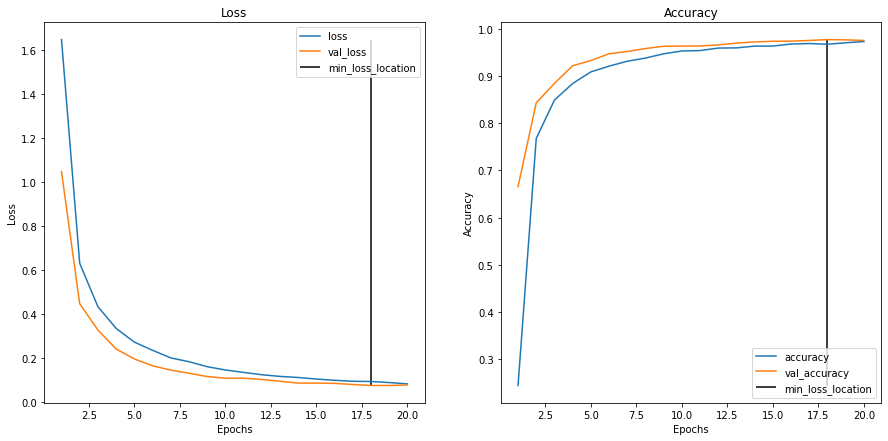

In [273]:
plot_training_curves(history)

In [274]:
# predict using the model
preds = model.predict(x_test)

In [275]:
x_test.shape

(4000, 28, 28, 1)

In [276]:
preds.shape

(4000, 27)

In [277]:
preds[0]

array([3.9160383e-15, 9.9997962e-01, 8.9027759e-07, 1.2289968e-06,
       7.0485009e-07, 1.7625001e-05, 7.8145472e-15, 2.7835168e-14,
       1.1346182e-14, 3.6717692e-14, 2.1999782e-14, 9.4207553e-14,
       5.7823433e-15, 2.0026305e-13, 1.8904325e-14, 2.2179436e-14,
       5.8253417e-14, 1.3303898e-14, 1.6582252e-14, 1.4303359e-14,
       3.7102781e-14, 5.8777080e-14, 5.2258049e-15, 1.3005980e-14,
       4.7655611e-15, 1.8663863e-13, 5.4648059e-15], dtype=float32)

In [278]:
# classify the test set

# predict using the model
preds = model.predict(x_test)
# argmax along rows to get classification
preds = np.argmax(preds, axis=1).astype("uint8")

accuracy_score(y_test, preds)

0.9715

In [279]:
preds.shape

(4000,)

## Working with 'Real' Images

In [280]:
!pip install pillow
import numpy as np
from PIL import Image

import matplotlib.pyplot as plt
import glob

pillow (PIL) is the python package for working with real images:

[https://pillow.readthedocs.io/en/stable/index.html](https://pillow.readthedocs.io/en/stable/index.html)

I have some images of cats in google drive that I'll be using for example.
How to mount google drive in the colab env:
[https://www.kaggle.com/questions-and-answers/162449](https://www.kaggle.com/questions-and-answers/162449)

In [47]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [281]:
#images = glob.glob('/content/gdrive/MyDrive/letters/*')
#images[:27]

In [282]:
images = glob.glob('/content/gdrive/MyDrive/letter2/*')
images[:27]

['/content/gdrive/MyDrive/letter2/Letter_D',
 '/content/gdrive/MyDrive/letter2/Letter_C',
 '/content/gdrive/MyDrive/letter2/Letter_B',
 '/content/gdrive/MyDrive/letter2/Letter_E',
 '/content/gdrive/MyDrive/letter2/Letter_A']

In [283]:
image1 = glob.glob('/content/gdrive/MyDrive/letter2/Letter_A/*')
image2 = glob.glob('/content/gdrive/MyDrive/letter2/Letter_B/*')
image3 = glob.glob('/content/gdrive/MyDrive/letter2/Letter_C/*')
image4 = glob.glob('/content/gdrive/MyDrive/letter2/Letter_D/*')
image5 = glob.glob('/content/gdrive/MyDrive/letter2/Letter_E/*')

images = (image1 + image2 + image3 + image4 + image5)


Open the image and resize it.
Note that the hand written images should be resized to (28,28).

[https://pillow.readthedocs.io/en/stable/reference/Image.html#PIL.Image.Image.resize](https://pillow.readthedocs.io/en/stable/reference/Image.html#PIL.Image.Image.resize)

In [284]:
images

['/content/gdrive/MyDrive/letter2/Letter_A/canvas (18).png',
 '/content/gdrive/MyDrive/letter2/Letter_A/canvas (23).png',
 '/content/gdrive/MyDrive/letter2/Letter_A/canvas (8).png',
 '/content/gdrive/MyDrive/letter2/Letter_A/canvas (13).png',
 '/content/gdrive/MyDrive/letter2/Letter_A/canvas (23) copy.png',
 '/content/gdrive/MyDrive/letter2/Letter_B/canvas (22).png',
 '/content/gdrive/MyDrive/letter2/Letter_B/canvas (12).png',
 '/content/gdrive/MyDrive/letter2/Letter_B/canvas (1).png',
 '/content/gdrive/MyDrive/letter2/Letter_B/canvas (7).png',
 '/content/gdrive/MyDrive/letter2/Letter_B/canvas (17).png',
 '/content/gdrive/MyDrive/letter2/Letter_C/canvas (26).png',
 '/content/gdrive/MyDrive/letter2/Letter_C/canvas (27).png',
 '/content/gdrive/MyDrive/letter2/Letter_C/canvas (11).png',
 '/content/gdrive/MyDrive/letter2/Letter_C/canvas (16).png',
 '/content/gdrive/MyDrive/letter2/Letter_C/canvas (21).png',
 '/content/gdrive/MyDrive/letter2/Letter_D/canvas (5).png',
 '/content/gdrive/MyDri

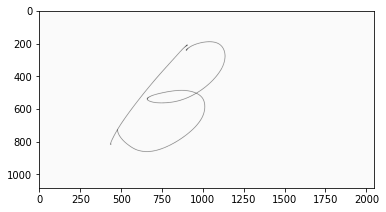

In [285]:
im = Image.open(images[5])
plt.imshow(im)

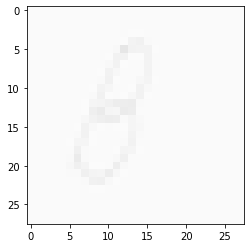

In [286]:
size = (28,28)
im = im.resize(size)
plt.imshow(im)

Convert the image to greyscale with "L" option.

[https://pillow.readthedocs.io/en/stable/reference/Image.html#PIL.Image.Image.convert](https://pillow.readthedocs.io/en/stable/reference/Image.html#PIL.Image.Image.convert)

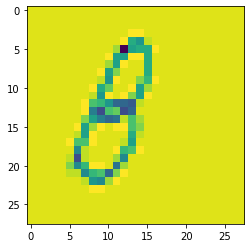

In [287]:
im = im.convert("L")
plt.imshow(im)

Build an array for training in the neural network

In [288]:
im = np.array(im)
im

array([[250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250,
        250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250,
        250, 250],
       [250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250,
        250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250,
        250, 250],
       [250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250,
        250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250,
        250, 250],
       [250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250,
        251, 251, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250,
        250, 250],
       [250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 251,
        243, 241, 249, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250,
        250, 250],
       [250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 248, 230,
        242, 243, 243, 251, 250, 250, 250, 250, 250, 250, 250, 250, 250,
        250, 250],
       [25

In [289]:
im.max()

251

In [290]:
print(im.shape)

(28, 28)


In [291]:
# load each image, run the initial conversion steps, combine in a list
new_images = []
new_size = (28,28)
for im in images[:25]:
  im = Image.open(im).convert("L").resize(new_size)
  new_images.append(np.array(im))
  

In [292]:
new_images[0].shape

(28, 28)

In [293]:
# "stack" the arrays
x_train_letters = np.stack(new_images)
print(x_train_letters.shape)

(25, 28, 28)


In [294]:
y = np.array([0]*5 + [1]*5 + [2]*5 + [3]*5 + [4]*5)
set(y)

#y = np.array([1] + [2] + [3] + [4] + [5] + [6] + [7] + [8] + [9] + [10] + [11] + [12] + [13] + [14] + [15] + [16] + [17] + [18] + [19] + [20] + [21] + [22] + [23] + [24] + [25] + [26] )
#y = np.array(1 + 2 + 3 + 4 + 5 + 6 + 7 + 8 + 9 + 10 + 11 + 12 + 13 + 14 + 15 + 16 + 17 + 18 + 19 + 20 + 21 + 22 + 23 + 24 + 25 + 26 + 27)

{0, 1, 2, 3, 4}

In [295]:
from sklearn.model_selection import train_test_split
(x_train_letters, y_train_letters), (x_test_letters, y_test_letters) = train_test_split(
 x_train_letters, y, test_size=0.33, random_state=42)


ValueError: ignored

In [296]:
#import numpy

#indices = numpy.random.permutation(x_train_letters.shape[0])
#training_idx, test_idx = indices[:75], indices[75:]
#x_train_letter, x_test_letter = x_train_letters[training_idx,:]/255, x_train_letters[test_idx,:]/255
#y_train_letter, y_test_letter = y[training_idx,:], y[test_idx,:]
#y_train_letter = y_train_image.astype(np.uint8)""


IndexError: ignored

In [297]:
# divide by the color channel
x_train_letters = x_train_letters / 251.
x_test_train = x_test / 251.

In [298]:
# as done in mnist add the color channel
x_train_letters = x_train_letters.reshape((25,28,28,1))
x_train_letters.shape

(25, 28, 28, 1)

In [299]:
# add the color channel
x_train = x_train.reshape(x_train.shape + (1,))
x_test = x_test.reshape(x_test.shape + (1,))

In [300]:
print(y.shape)

(25,)


Look at some numbers



ValueError: ignored

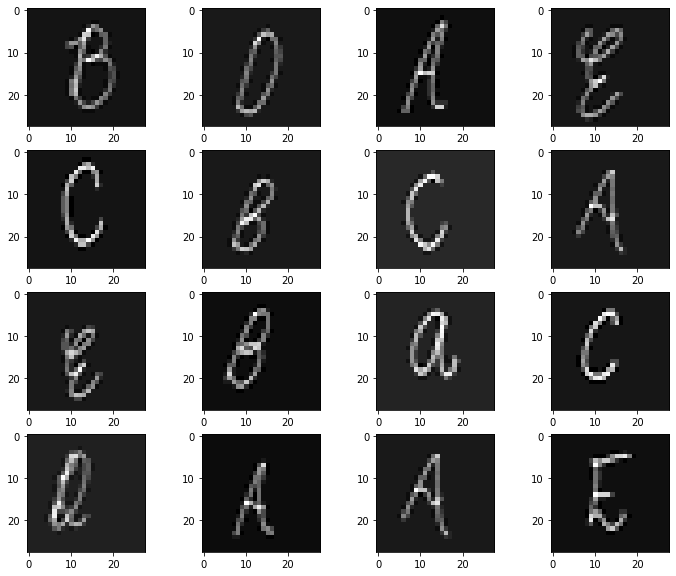

In [304]:
# Look at some random Alphabet
X_shuffle = shuffle(x_train_letters.copy(), random_state=42)

print('Look at some numbers\n')
plt.figure(figsize = (12,10))
row, colums = 4, 4
for i in range(25):
    plt.subplot(colums, row, i+1)
    plt.imshow(X_shuffle[i].reshape(28,28),interpolation='nearest', cmap='Greys')
plt.show()

In [305]:
# lock the ConvNet layers
layer_trainable = False
for layer in model.layers:
  layer.trainable = layer_trainable
  if layer.name == 'flatten':
    layer_trainable = True

print(f"{'Layer Name':17} {'Is Trainable?'}")
for layer in model.layers:
  print(f"{layer.name:17} {layer.trainable}")

Layer Name        Is Trainable?
conv2d_6          False
max_pooling2d_6   False
conv2d_7          False
max_pooling2d_7   False
flatten           False
dropout_3         True
dense_9           True
penult            True
last              True


In [306]:
# get the penultimate layer of the model
penult_layer = model.get_layer(name='penult')

# create a new output layer
output_layer = keras.layers.Dense(5, activation='softmax')(penult_layer.output)

# create new model with new output layer
new_model = Model(model.input, output_layer)

In [307]:
new_model.summary()

Model: "model_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6_input (InputLayer)  [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 11, 11, 32)        9248      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 800)               0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 800)               0   

In [315]:
new_model.compile(loss='sparse_categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])

new_model_hist = new_model.fit(x_train_letter, y,
                               validation_split=0.2,
                               #validation_data=(y_train, y_test),
                              batch_size=32,
                              epochs=1000,
                              callbacks=[es])

Epoch 1/1000
1/1 [==============================] - 1s 963ms/step - loss: 1.6085 - accuracy: 0.2500 - val_loss: 1.6149 - val_accuracy: 0.0000e+00
Epoch 2/1000
1/1 [==============================] - 0s 34ms/step - loss: 1.6081 - accuracy: 0.2500 - val_loss: 1.6166 - val_accuracy: 0.0000e+00
Epoch 3/1000
1/1 [==============================] - 0s 31ms/step - loss: 1.6077 - accuracy: 0.2500 - val_loss: 1.6182 - val_accuracy: 0.0000e+00


In [336]:
# predict using the model
preds_New = new_model.predict(x_test)
print(preds_New)

[[0.30384907 0.27001327 0.18280417 0.0926122  0.1507213 ]
 [0.3597723  0.20429084 0.14514484 0.12933846 0.1614536 ]
 [0.15101716 0.07800202 0.23571633 0.29577395 0.23949061]
 ...
 [0.12538101 0.19535066 0.06519274 0.3187039  0.29537174]
 [0.33239874 0.10996535 0.23486759 0.11516452 0.20760387]
 [0.16773288 0.15130383 0.05947857 0.3746917  0.24679302]]


In [338]:
# classify the test set

# argmax along rows to get classification
preds_New = np.argmax(preds, axis=1).astype("uint8")

accuracy_score(y_test, preds_New)

0.13625

In [331]:
def plot_training_curves(new_model_hist, title=None):
    ''' Plot the training curves for loss and accuracy given a model history
    '''
    # find the minimum loss epoch
    minimum = np.min(new_model_hist.new_model_hist['val_loss'])
    min_loc = np.where(minimum == new_model_hist.new_model_hist['val_loss'])[0]
    # get the vline y-min and y-max
    loss_min, loss_max = (min(new_model_hist.new_model_hist['val_loss'] + new_model_hist.new_model_hist['loss']),
                          max(new_model_hist.new_model_hist['val_loss'] + new_model_hist.new_model_hist['loss']))
    acc_min, acc_max = (min(new_model_hist.new_model_hist['val_accuracy'] + new_model_hist.new_model_hist['accuracy']),
                        max(new_model_hist.new_model_hist['val_accuracy'] + new_model_hist.new_model_hist['accuracy']))
    # create figure
    fig, ax = plt.subplots(ncols=2, figsize = (15,7))
    fig.suptitle(title)
    index = np.arange(1, len(new_model_hist.new_model_hist['accuracy']) + 1)
    # plot the loss and validation loss
    ax[0].plot(index, new_model_hist.new_model_hist['loss'], label = 'loss')
    ax[0].plot(index, new_model_hist.new_model_hist['val_loss'], label = 'val_loss')
    ax[0].vlines(min_loc + 1, loss_min, loss_max, label = 'min_loss_location')
    ax[0].set_title('Loss')
    ax[0].set_ylabel('Loss')
    ax[0].set_xlabel('Epochs')
    ax[0].legend()
    # plot the accuracy and validation accuracy
    ax[1].plot(index, new_model_hist.new_model_hist['accuracy'], label = 'accuracy')
    ax[1].plot(index, new_model_hist.new_model_hist['val_accuracy'], label = 'val_accuracy')
    ax[1].vlines(min_loc + 1, acc_min, acc_max, label = 'min_loss_location')
    ax[1].set_title('Accuracy')
    ax[1].set_ylabel('Accuracy')
    ax[1].set_xlabel('Epochs')
    ax[1].legend()
    plt.show()

In [330]:
plot_training_curves(new_model_hist)

AttributeError: ignored

## For Next Week



1. Start working on your dataset
2. Write the code to bring in your dataset (resize images to same as mnist)
3. Write the code to preprocess your dataset (same as mnist)